<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.

Author: David Haviland  
Affiliation: Nanostructure Physics, KTH Royal Institute of Technology, 106 91 Stockholm, Sweden  
Email: haviland@kth.se  
Original release date: 2025-10-29


# SQUID lab notebook

This notebook is designed for taking and analyzing data in the SQUID lab of the Quantum Technology course SK2903 at KTH, The Royal Institute of Technology.  In the laboratory students will transfer data from the digital oscilloscope into their laptops running their copy of this notebook.  The notebook is designed to help them quickly make preliminary plots to check that the data are OK. At home, students will complete their own copy of the notebook by performing the tasks described in the description of the SQUID lab (file: SQUID_lab_description.pdf).  

Completing these tasks will require writing Python scripts in this notebook to analyze the data and fit theory to the data.  This analysis should result in a several good quality figures.  For each figure students are required to write a brief and descriptive caption, as for a scientific publication.  Each figure caption should strive to be a 'masterpiece of logic, and a marvel of compression and adequacy'.  Students are also required to complete the homework tasks given in the SQUID lab description, where all necessary theory is described.

The goal is to complete this notebook so as to demonstrate to the examiner who will read the notebook, that the student understood the physics of this lab.  

## Getting data from the oscilloscope in to this Python notebook

You will collect data on a digital oscilloscope, which digitizes two signals or two voltages as a functions of time.  Channel 1 is denoted  $V_1(t)$ and channel 2 two $V_2(t)$.  For your analysis you will want to plot this data as $X$-$Y$ plots, for example $V_1(t)$ vs. $V_2(t)$, with the voltages converted a relevant physical quantity. The digital data is stored as a comma separated value (csv) file on a memory stick and transfered to your laptop. The cell below demonstrates reading the data from a demonstration csv file, and plotting the two oscilloscope traces.  The cell also demonstrates fitting a linear function to the $V_2(t)$ data.

## Figures and Captions

Write Python code in the cells below to generate the three figures as described in section 9 'Measurements and Lab report' of the SQUID lab description.  The figures should be publication quality, well labeled using text and symbols, with clear and concise legends and annotations.  After each figure make a separate markdown cell with a figure caption.  The caption should concisely state what the figure demonstrates, and what conclusions you draw from the analysis of the data.



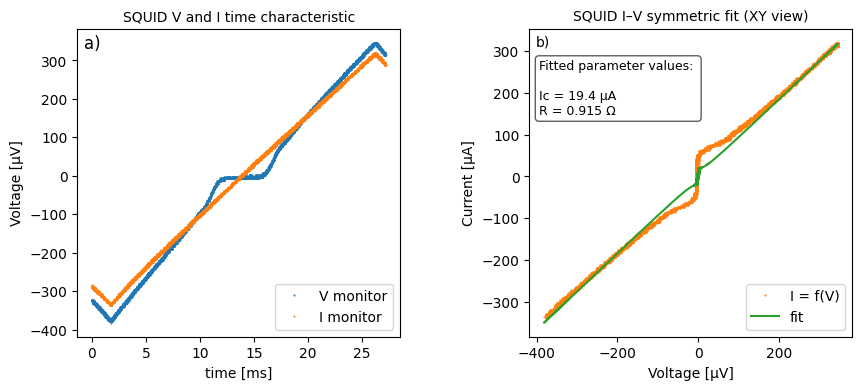

In [ ]:
# Figure 1:  python code for SQUID IVC and fit to theory

file_name = 'IV.csv' #replace the file name with the name of your data file

time,V1,V2 = np.loadtxt(file_name, delimiter=',', skiprows=12, usecols=(0,1,2),max_rows=6800, unpack=True)

### Parameters

Rb = 10 # ohm
gain_V1 = 10000
gain_V2 = 1000

I = V2/(gain_V2*Rb)
V = V1/gain_V1

I_uA = I*1e6
V_uV = V*1e6


### set up figure with two axes

fig1=plt.figure(num=1, figsize=(10,4))
fig1.clf()
ax1=fig1.add_subplot(121)
ax2=fig1.add_subplot(122)


### plot raw data on axis 1
ax1.plot(time*1000, V_uV, '.', color ='C0', markersize=1, label='V monitor')
ax1.plot(time*1000, I_uA, '.', color ='C1', markersize=1, label='I monitor')
ax1.set_title("SQUID V and I time characteristic", fontsize=10, pad=6)
ax1.set_xlabel('time [ms]')
ax1.set_ylabel('Voltage [µV]')
ax1.text(0.02, 0.98, 'a)', transform=ax1.transAxes,ha='left', va='top', fontsize=12)
ax1.legend()

### Fitting function :  Symmetric
def I_sym(V_uV, Ic_uA, R):

      return np.sign(V_uV) * np.sqrt((V_uV / R)**2 + Ic_uA**2)

params = np.array([1.,2.]) # array with initial values of parameters
p_opt, p_conv = curve_fit(I_sym, V_uV,I_uA,params) # perform the curve fit
Ic, R = p_opt[0], 1/p_opt[1]


## plot the raw data and the fit
ax2.plot(V_uV,I_uA, '.', markersize=1, label='I = f(V)', color='C1')
ax2.plot(V_uV, I_sym(V_uV, Ic, 1/R), label='fit', color='C2')
ax2.set_title("SQUID I–V symmetric fit (XY view)", fontsize=10, pad=6)
ax2.set_xlabel('Voltage [µV]')
ax2.set_ylabel('Current [µA]')
ax2.legend()

ax2.text(0.02, 0.98, 'b)', transform=ax2.transAxes, ha='left', va='top')
ax2.text(0.03, 0.90, "Fitted parameter values: \n\n" f"Ic = {p_opt[0]:.1f} µA\nR = {1.0/p_opt[1]:.3f} Ω" ,
        transform=ax2.transAxes,
        va="top", ha="left",
        fontsize=9,
        bbox=dict(boxstyle="round", facecolor="w", alpha=0.9, ec="0.3"))

fig1.subplots_adjust(wspace=0.4)
fig1.canvas.draw()
fig1.show()
#fig1.savefig('demo_read_plot_fit.png', dpi=300)



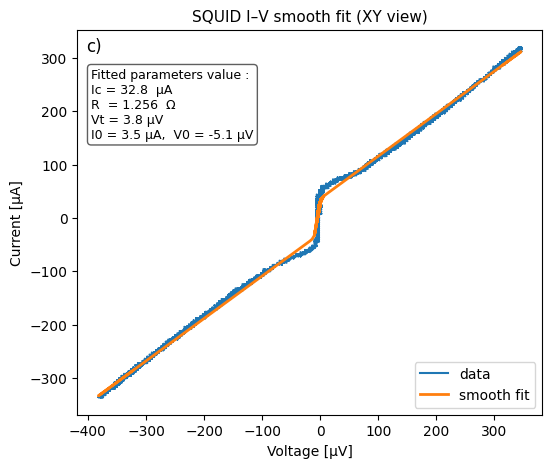

In [ ]:
### Smoother fitting

fig4=plt.figure(num=1, figsize=(6,5))
fig4.clf()
ax3=fig4.add_subplot(111)

### Fitting function :  adding

def I_smooth(V, Ic, R, Vt, I0, V0):
    return I0 + (V/R) + Ic*np.tanh((V - V0)/Vt)

popt, pcov = curve_fit(I_smooth, V_uV, I_uA)
Ic, R, Vt, I0, V0 = popt

ax3.plot(V_uV, I_uA, '-', ms=1.5, label='data')
ax3.plot(V_uV, I_smooth(V_uV, *popt), '-', lw=2, label='smooth fit')

ax3.set_title('SQUID I–V smooth fit (XY view)', fontsize=11, pad=6)
ax3.set_xlabel('Voltage [µV]')
ax3.set_ylabel('Current [µA]')
ax3.legend(loc='best')

ax3.text(0.02, 0.98, 'c)', transform=ax3.transAxes, ha='left', va='top', fontsize=12)
ax3.text(
    0.03, 0.90,
    ("Fitted parameters value :\n"
     f"Ic = {Ic:.1f}  µA\n"
     f"R  = {R:.3f}  Ω\n"
     f"Vt = {Vt:.1f} µV\n"
     f"I0 = {I0:.1f} µA,  V0 = {V0:.1f} µV"),
    transform=ax3.transAxes, ha='left', va='top',
    fontsize=9,
    bbox=dict(boxstyle='round', facecolor='w', alpha=0.9, ec='0.3')
)

fig4.canvas.draw()
fig4.show()


**FIGURE 1 CAPTION:**

**(a)** Voltage-monitor and current-monitor signals versus time (scope traces; monitors converted to µV/µA). I is sweeped with a ramp.

**(b)** Parametric plot I(V) built from the same samples (XY view). The data are fitted with the symmetric RSJ form (working in the overdamped regime Q<<1):

<center>$I(V) = \operatorname{sgn}(V)\,\sqrt{\left(\frac{V}{R}\right)^2 + I_c^{\,2}}$</center>

**(c)** Measured I(V) (blue) and a smooth model (orange). This model replaces the discontinous sign function by a soft-sign :

<center> $\operatorname{sgn}(V) \;\approx\; \frac{2}{\pi}\,\arctan\!\left(\frac{V - V_0}{V_t}\right)$</center>

This form of sign approximation is common choice for fitting such behaviour. The parameter Vt sets the width of the transition and captures the rounding of the “knee” due to finite temperature/phase diffusion. It's a handy phenomenological parameter. I0 and V0 account for small offsets.

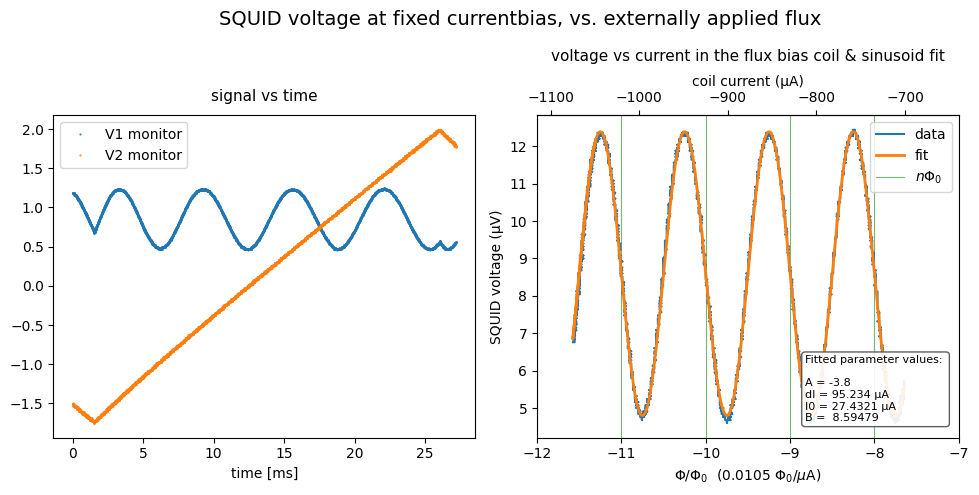

M =  2.17e-11


In [ ]:
# Figure 2: python code for V-Phi curve and fit to determine mutual inductance

file_name = 'VFLUX.csv'

time,V1,V2 = np.loadtxt(file_name, delimiter=',', skiprows=12, usecols=(0,1,2),max_rows=6800, unpack=True) # V1 = Voltage monitor, V2 = Current monitor

offset_V2 = 9 # to center the time curve
amplify_V1 = 10

### set up figure with two axes

fig1=plt.figure(num=1, figsize=(10,5))
fig1.clf()
ax1=fig1.add_subplot(121)
ax2=fig1.add_subplot(122)
fig1.suptitle('SQUID voltage at fixed currentbias, vs. externally applied flux',  fontsize=14)

ax1.set_title('signal vs time', fontsize=11, pad=10)
ax2.set_title('voltage vs current in the flux bias coil & sinusoid fit', fontsize=11, pad=10)
fig1.set_constrained_layout(False)
fig1.subplots_adjust(top=0.3)

### plot raw data on axis 1
ax1.plot(time*1000, V1*amplify_V1, '.', color ='C0', markersize=1, label='V1 monitor') # factor 1000 to change time scale from seconds to ms
ax1.plot(time*1000, V2+offset_V2, '.', color ='C1', markersize=1, label='V2 monitor')
ax1.set_xlabel('time [ms]')
ax1.legend()

Rb = 10 # ohm
gain_V1 = 10000
gain_V2 = 1000

I = (V2/(gain_V2*Rb)) *1e6 #
V = (V1/gain_V1)  *1e6

# model: sine vs current with period ΔI and center I0
def V_model(I, A, dI, I0, B):
    return A * np.sin(2*np.pi*(I-I0)/dI) + B

# initial guesses
A0 = 0.5*(V.max() - V.min())
B0 = V.mean()
dI0 = (I.max() - I.min())/4.0  # 4 periods on the time display

p0 = [A0, dI0, 0, B0]

p_opt, _ = curve_fit(V_model, I, V, p0=p0,  maxfev=20000)
A, dI, I0,B = p_opt

phi0 = 2.07*1e-15 # Wb

M = phi0/(dI*1e-6)  # Mutual inductance
M_2decimal = np.format_float_scientific(M, unique=False, precision=2, trim='-') # leaving only precision to two decimals

phi = (I-I0)/dI

# data and fit, axis parameters
ax2.plot(phi, V, '-', ms=1.0, label='data')
ax2.plot(phi, V_model(I, *p_opt), lw=2, label='fit')
ax2.set_xlabel(r'$\Phi/\Phi_0$' + f'  ({M*1e-6/phi0:.4f} $\\Phi_0/\\mu$A)')
ax2.set_ylabel('SQUID voltage (µV)')
ax2.legend(loc='upper right')

ax2.text(1.57, 0.22, "Fitted parameter values: \n\n" f"A = {A:.1f}\ndI = {dI:.3f} µA \nI0 = {I0:.4f} µA\nB =  {B:.5f}" ,
        transform=ax3.transAxes,
        va="top", ha="left",
        fontsize=8,
        bbox=dict(boxstyle="round", facecolor="w", alpha=0.9, ec="0.3"))

# top x-axis: coil current in µA
ax_top = ax2.secondary_xaxis(
    'top',
    functions=(lambda ph: (dI*ph + I0),      # bottom→top
               lambda Iu: (Iu-I0)/dI)     # top→bottom
)
ax_top.set_xlabel('coil current (µA)')

# show the nΦ0 as green vertical lines

nmin = int(np.floor(phi.min()))
nmax = int(np.ceil(phi.max()))
ax2.set_xticks(np.arange(nmin, nmax+1))

for i, n in enumerate(range(nmin, nmax+1)):
    ax2.axvline(n, color='green', alpha=0.55, lw=0.8, zorder=0, label=r'$n\Phi_0$' if i == 0 else None)
ax2.legend(loc='best')

plt.tight_layout()
plt.show()
print("M = ",M_2decimal)

**FIGURE 2 CAPTION:**

**a)** Here we sweep the flux-bias coil current with a ramp. As the ramp increases, the SQUID voltage oscillates because the SQUID is periodic in magnetic flux with period Φ0 (flux quantum):
<center>$V(\Phi) \approx A \sin\!\left( 2\pi\,\frac{\Phi - \Phi_{\mathrm{off}}}{\Phi_0} \right) + B $ </center>

**b)** SQUID voltage vs. coil current with a sinusoidal fit.

Indeed, by substituting:

<center>$I = \frac{\Phi}{M}$, $\Delta I = \frac{\Phi_0}{M}$ , $I_0 = \frac{\Phi_off}{M}$</center>

We get the fitting sinusoide curve V=f(I):
<center>$V(I) \approx A \sin\!\left( 2\pi\,\frac{I - I_0}{\Delta I} \right) + B $ </center>

By measuring the amount of current (∆I) in the coil that is required to produce a change of one fluxon through the hole of the SQUID, we can determine the mutual inductance between the lux and the current M, using the following formula:

<center> $M = \frac{\Phi_0}{\Delta I}$ </center>

We get $M = 2.17\times 10^{-11}\ \mathrm{H}$ (Cf result at the end of the cell).

We also notice that the $n\Phi_0$ markers are correctly placed and correspond to currents $I_n = I_0 + n\,\Delta I$ on the upper axis.



0.9108 V


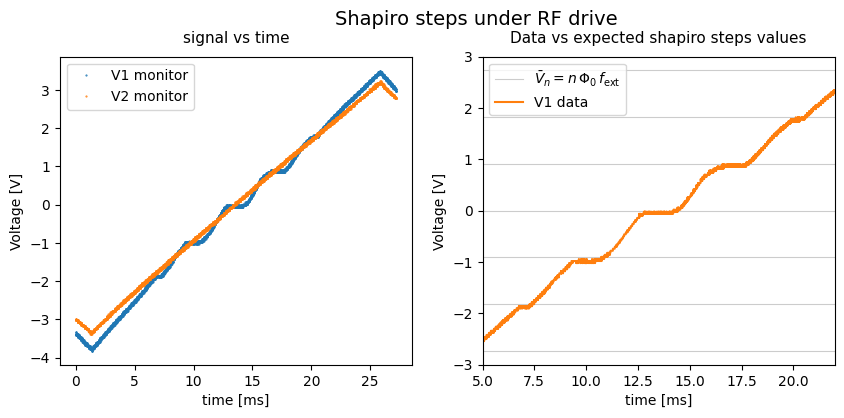

In [ ]:
# Figure 3:  python code for figure demonstrating Shapiro steps at theoretically expected values

file_name = 'shapiro_data.csv' #replace the file name with the name of your data file

time,V1,V2 = np.loadtxt(file_name, delimiter=',', skiprows=12, usecols=(0,1,2),max_rows=6800, unpack=True)

### set up figure with two axes
fig1=plt.figure(num=1, figsize=(10,4))
fig1.clf()
ax1=fig1.add_subplot(121)
ax2=fig1.add_subplot(122)
fig1.text (0.4,0.96,'Shapiro steps under RF drive',  fontsize=14)

ax1.set_title('signal vs time', fontsize=11, pad=10)
ax2.set_title('Data vs expected shapiro steps values', fontsize=11, pad=10)


### plot raw data on axis 1
ax1.plot(time*1000, V1, '.', color ='C0', markersize=1, label='V1 monitor')
ax1.plot(time*1000, V2, '.', color ='C1', markersize=1, label='V2 monitor')
ax1.set_xlabel('time [ms]')
ax1.set_ylabel('Voltage [V]')
ax1.legend()

# plot straight horizontal lines at shapiro steps expected values

fext = 44*1e9 # Hz

dV = fext*phi0*gain_V1  # Volts per step * gain

V_int_min = int(np.floor(V1.min())/dV)
V_int_max = int(np.ceil(V1.max())/dV)

for n in range(V_int_min,V_int_max):
     Vstep = n*dV
     ax2.axhline(Vstep, color='0.8', lw=0.8, zorder=0, label=r'$\bar{V}_n = n\,\Phi_0\,f_{\mathrm{ext}}$' if n ==0 else None)
ax2.legend(loc='best')

# plotting the empirical data for comparison

ax2.plot(time*1000, V1, '-', markersize=1, label='V1 data', color='C1')

# Parametring the second figure, zooming on the steps

ax2.set_xlabel('time [ms]')
ax2.set_ylabel('Voltage [V]')
ax2.set_xlim(5, 22)
ax2.set_ylim(-3, 3)
ax2.legend()
fig1.canvas.draw()
fig1.show()
fig1.savefig('demo_read_plot_fit.png', dpi=300)

print(dV, "V")


**FIGURE 3 CAPTION**

**a)** Time traces of the voltage (V1, blue) and current monitor (V2, orange) while applying an RF tone to the SQUID via an antenna at $f_{ext} = 44 GHz$ and sweeping the DC bias current. The SQUID voltage shows a staircase with flat plateaus.

**b)** Measured V1(t) (orange) overlaid with the expected Shapiro-step voltages
$\bar{V}_n=n\Phi_0f_{ext}$ (grey horizontal guides). The plateaus align with these quantized levels, and the vertical spacing equals
$\Delta V=\Phi_0 * f_{ext} * gain_{V1} = 0.91 V$ (Cf result at the end of the cell), confirming both the RF frequency and the voltage-gain calibration.

# Solution to homework problems

Write your solution to both homework problems below, preferably as Markdown (Latex) code in this cell, but I will also accept a handwritten solution pasted in this notebook as an image.



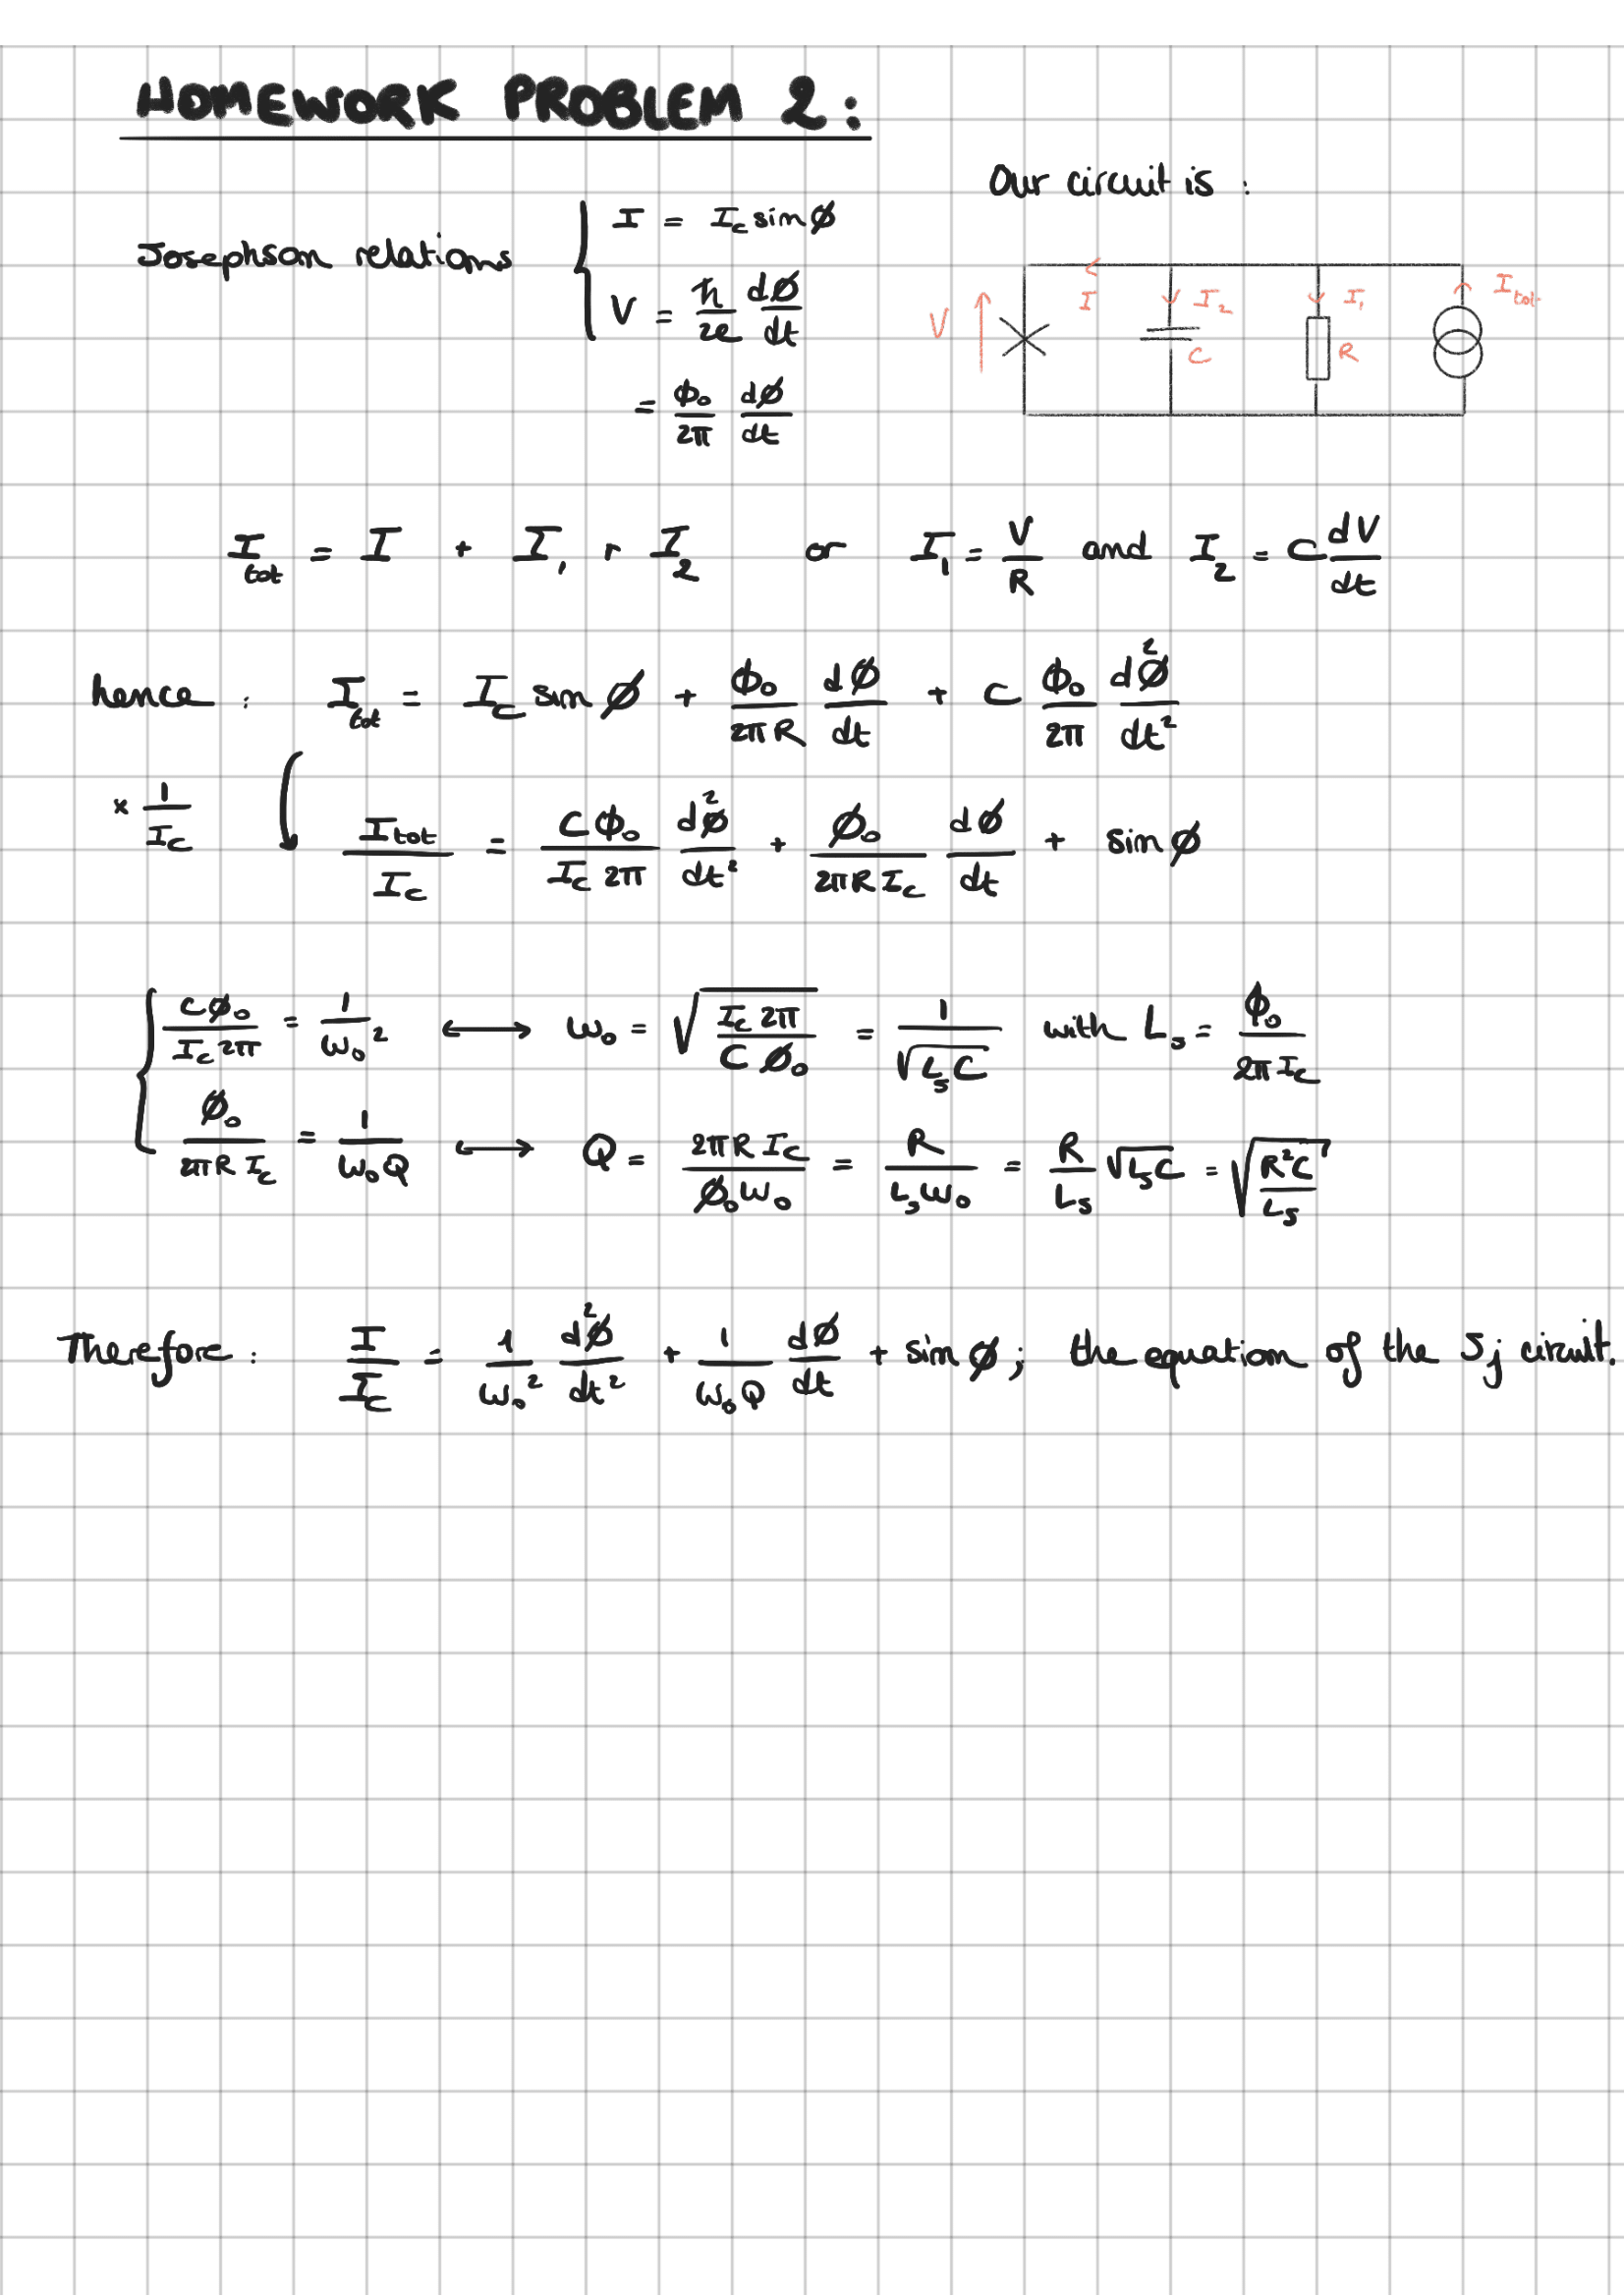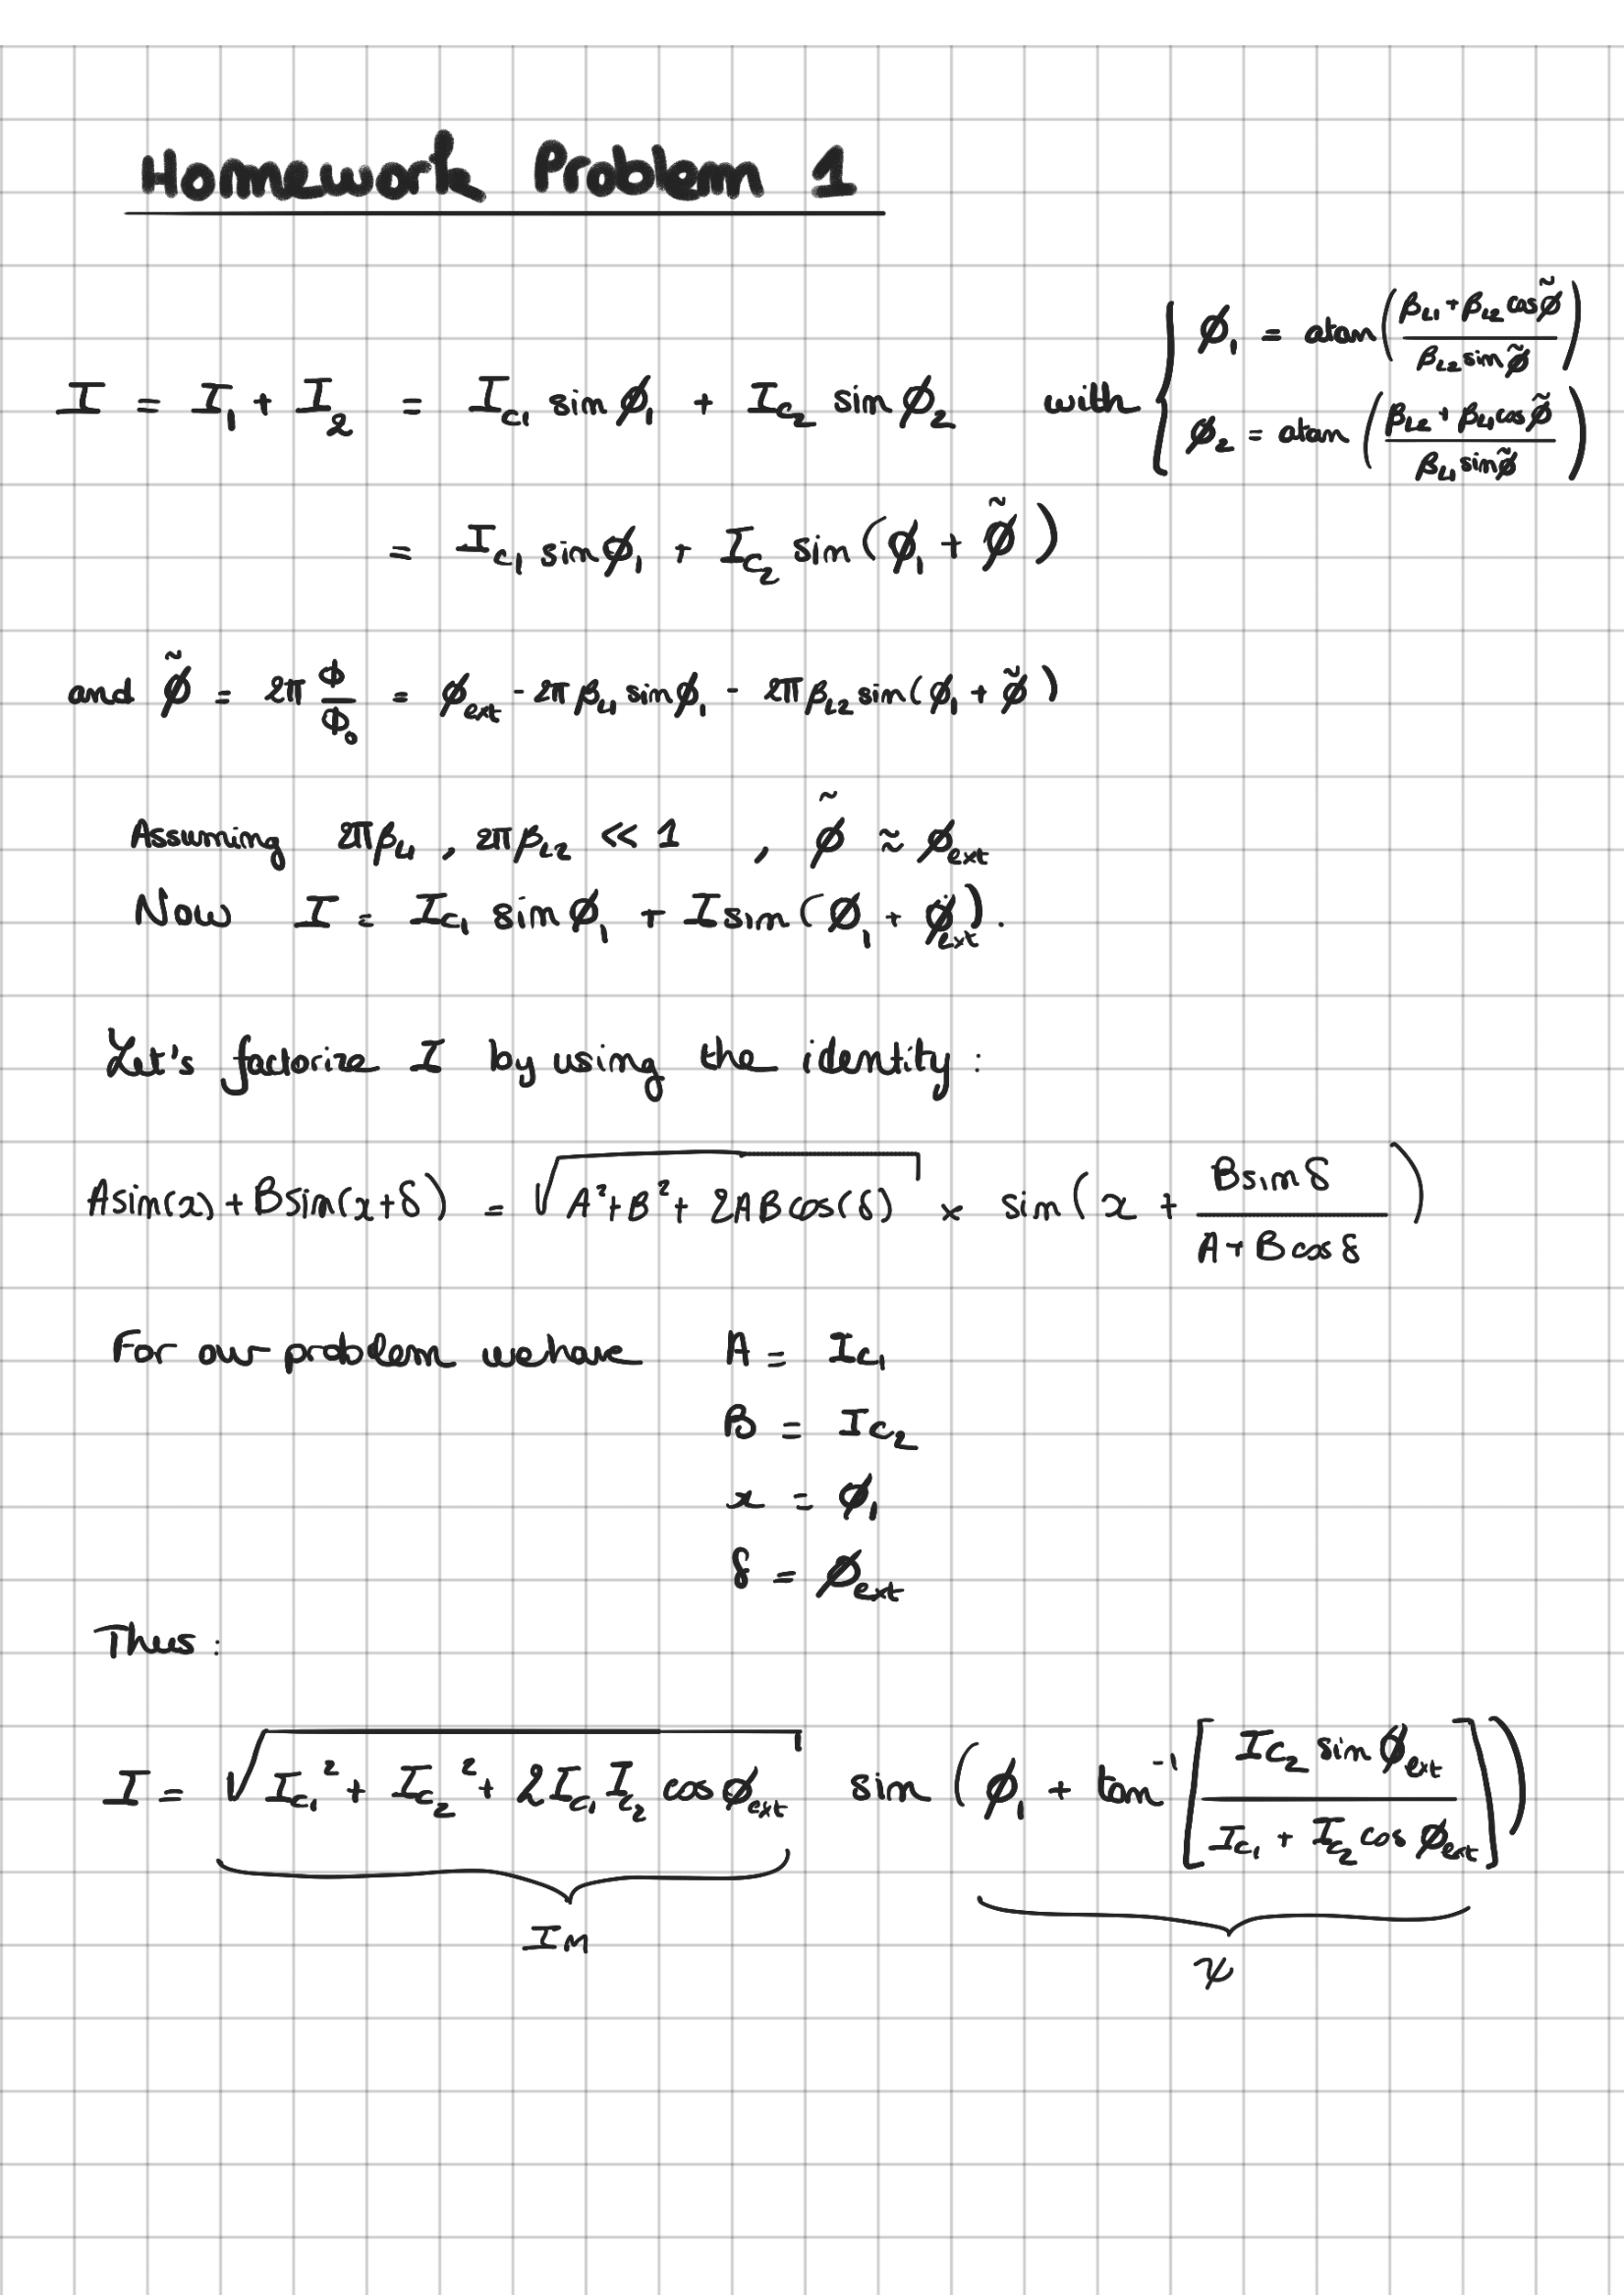